*Sjekk først at du har installert pakkene riktig ved å kjøre kodeblokken under:*

In [2]:
from graph_utils.graph import Graph, nx, plt
from graph_utils.buss_graph import BussGraph
from graph_utils.tree_graph import TreeGraph
from graph_utils.ring_graph import RingGraph
from graph_utils.star_graph import StarGraph
from graph_utils.grid_graph import GridGraph
from graph_utils.mesh_graph import MeshGraph
from graph_utils.constructed_graph import ConstructedGraph
from graph_utils.watts_strogatz import WattsStrogatz
from graph_utils.barabasi_albert import BarabasiAlbert
from graph_utils.real_network_graph import RealNetworkGraph
from graph_utils.vdes_graph import VDESGraph
from graph_utils.get_network import get_network
import matplotlib
import numpy as np
import random as r

*Gå nøye gjennom Introduksjonsnotebooken før du gjør øvingen. Alle verktøy du vil trenge presenteres der.*

In [3]:
student_seed = 10027 #Skriv inn kandidatnummeret ditt her, 10XXX 

# Introduksjon
I denne øvingen skal vi lære om ulike måter å måle viktigheten, eller sentraliteten, til en node i et nettverk. Vi skal også se på ulike graftyper, lære enkel analyse og til slutt se på tilfeldige og målrettede feil i et nettverk.

Følgende temaer er forventet at du skal kunne etter denne øvingen:
* Sentraliteter
* Mål på sammenkobling av nettverk
    * Noder i største partisjon
* Angrepsmål i et nettverk
    * Viktigheten av en node
    * Angrepsstrategier i nettverk
* Robusthet/utholdenhet
    * Redundans
* Kostnad ved redundans/trade-offs og effekten av dette




For å gjennomføre denne øvingen forventes det at man har gjennomført introduksjonen, og kan bruke verktøyene som ble introdusert der til mer krevende oppgaver. For oppgavene nedenfor forventes det at studenten klarer å svare kort og konkret.

# Del 1: Grafstrukturer og centralities
I denne delen skal vi introdusere mål på viktigheten for en node i et nettverk. Her skal vi lære om tre forskjellige standariserte mål: 
* degree centrality
* betweenness centrality
* closeness centrality. 

Vi skal også ta en nærmere titt på ulike graftyper og analysere deres fordeler og ulemper.

## Oppgave 1.1
Enkle grafstrukturer som er mye brukt er mesh, star, ring, tree og bus. Ved hjelp av metodene introdusert i introduksjonen, konstruer og print en enkel versjon av hver graf (5-10 noder).

<em> Her forventer vi å se de fem graftypene konstruert og printet </em>

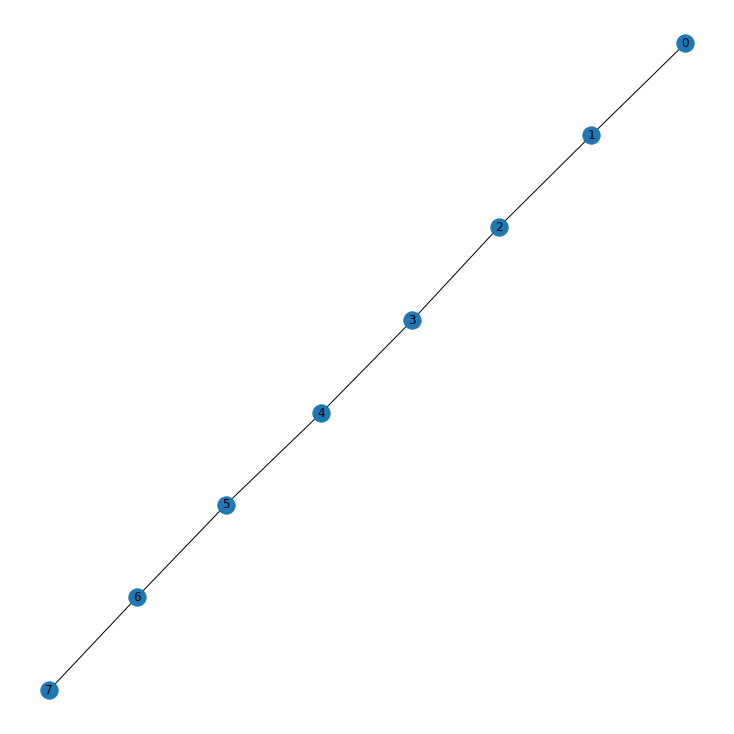

In [4]:
#Bus
BussGraph(8).draw()

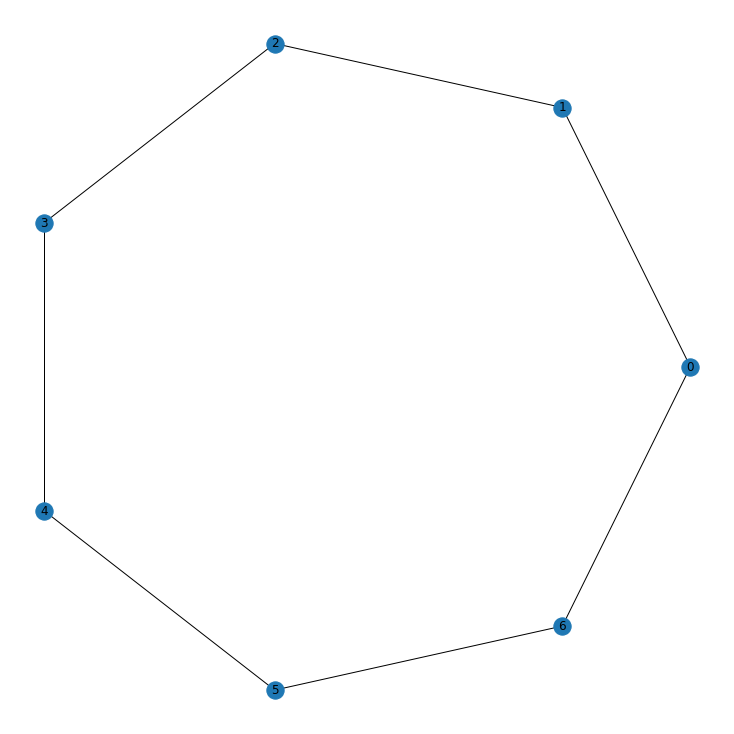

In [24]:
#Ring
RingGraph(7).draw()

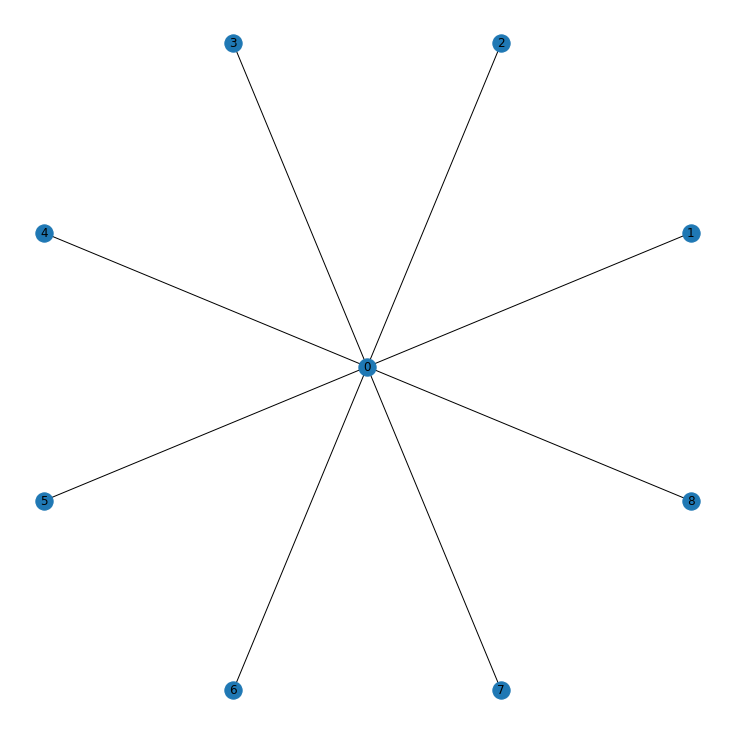

In [25]:
#Star
StarGraph(8).draw()

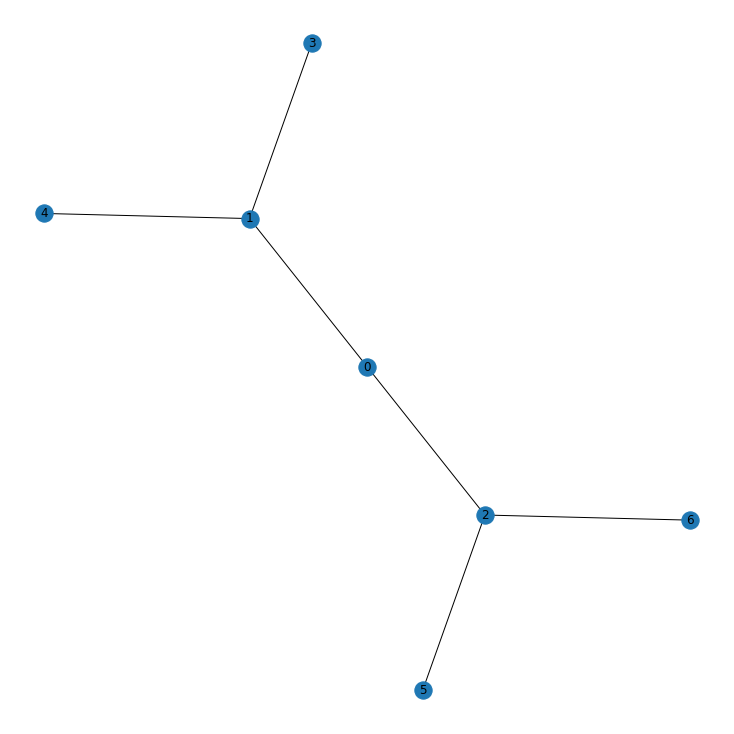

In [95]:
#Tree
TreeGraph(2,2).draw()

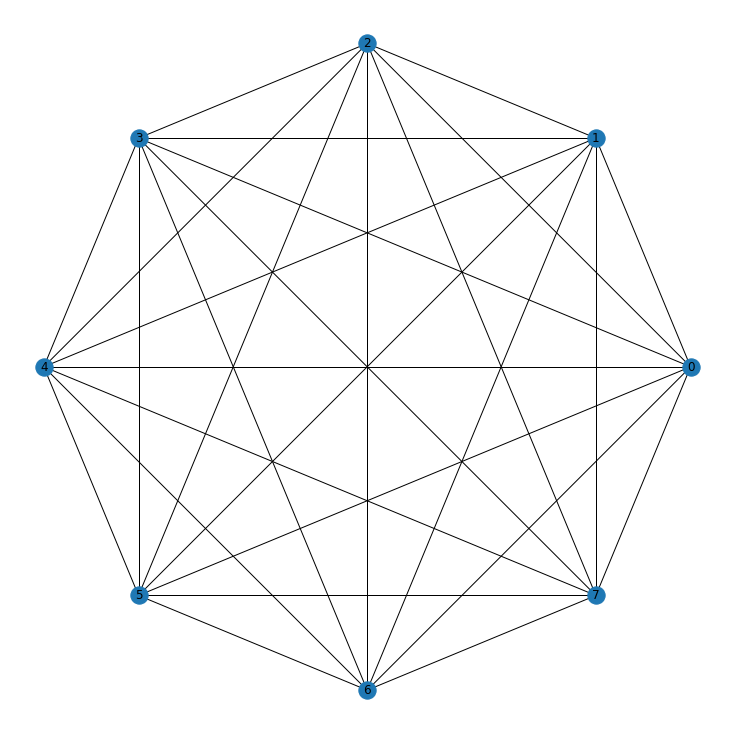

In [171]:
#Mesh
MeshGraph(8).draw()

## Oppgave 1.2
For hver av strukturene gitt i oppgave 1.1, kom med et eksempel fra virkeligheten som bruker denne strukturen. For hver av strukturene, kommenter hva som er styrker og svakheter.

<em> For hver graf forventer vi å se minst ett eksempel på hvor denne strukturen brukes. Vi forventer også en kort drøftning på styrker og svakheter </em>

In [ ]:
#Skriv svar her:

## Oppgave 1.3
For hver graf, finn noden med høyest degree centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet degree centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig.</em>

In [5]:
#Bus
print("BussGraph: \n")
print("Formula for degree centrality for each node is:")
print("(amount of edges the node has) / (amount of nodes in the graph - 1) \n")

buss_graph = BussGraph(8)

node_count = len(buss_graph.nodes())
for node, degree in buss_graph.degree():
    
    centrality = degree / (node_count - 1)
    formula_str = "( " + str(degree) + " / " + str(node_count) + " - 1 )"
    node_str = "Node " + str(node) + ":".ljust(2)
    print(node_str, "Degree centrality=", formula_str, "=>" , centrality)


BussGraph: 

Formula for degree centrality for each node is:
(amount of edges the node has) / (amount of nodes in the graph - 1) 

Node 0:  Degree centrality= ( 1 / 8 - 1 ) => 0.14285714285714285
Node 1:  Degree centrality= ( 2 / 8 - 1 ) => 0.2857142857142857
Node 2:  Degree centrality= ( 2 / 8 - 1 ) => 0.2857142857142857
Node 3:  Degree centrality= ( 2 / 8 - 1 ) => 0.2857142857142857
Node 4:  Degree centrality= ( 2 / 8 - 1 ) => 0.2857142857142857
Node 5:  Degree centrality= ( 2 / 8 - 1 ) => 0.2857142857142857
Node 6:  Degree centrality= ( 2 / 8 - 1 ) => 0.2857142857142857
Node 7:  Degree centrality= ( 1 / 8 - 1 ) => 0.14285714285714285
{0: 0.14285714285714285, 1: 0.2857142857142857, 2: 0.2857142857142857, 3: 0.2857142857142857, 4: 0.2857142857142857, 5: 0.2857142857142857, 6: 0.2857142857142857, 7: 0.14285714285714285}


In [23]:
#Ring
print("RingGraph: \n")
print("Formula for degree centrality for each node is:")
print("(amount of edges the node has) / (amount of nodes in the graph - 1) \n")

ring_graph = RingGraph(7)

node_count = len(ring_graph.nodes())
for node, degree in ring_graph.degree():
    
    centrality = degree / (node_count - 1)
    formula_str = "( " + str(degree) + " / " + str(node_count) + " - 1 )"
    node_str = "Node " + str(node) + ":".ljust(2)
    print(node_str, "Degree centrality=", formula_str, "=>" , centrality)

RingGraph: 

Formula for degree centrality for each node is:
(amount of edges the node has) / (amount of nodes in the graph - 1) 

Node 0:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 1:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 2:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 3:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 4:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 5:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 6:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333


In [252]:
#Star
print("StarGraph: \n")
print("Formula for degree centrality for each node is:")
print("(amount of edges the node has) / (amount of nodes in the graph - 1) \n")

star_graph = StarGraph(8)

node_count = len(star_graph.nodes())
for node, degree in star_graph.degree():
    
    centrality = degree / (node_count - 1)
    formula_str = "( " + str(degree) + " / " + str(node_count) + " - 1 )"
    node_str = "Node " + str(node) + ":".ljust(2)
    print(node_str, "Degree centrality=", formula_str, "=>" , centrality)

StarGraph: 

Formula for degree centrality for each node is:
(amount of edges the node has) / (amount of nodes in the graph - 1) 

Node 0:  Degree centrality= ( 8 / 9 - 1 ) => 1.0
Node 1:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 2:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 3:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 4:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 5:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 6:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 7:  Degree centrality= ( 1 / 9 - 1 ) => 0.125
Node 8:  Degree centrality= ( 1 / 9 - 1 ) => 0.125


In [87]:
#Tree
print("TreeGraph: \n")
print("Formula for degree centrality for each node is:")
print("(amount of edges the node has) / (amount of nodes in the graph - 1) \n")

tree_graph = TreeGraph(2,2)

node_count = len(tree_graph.nodes())
for node, degree in tree_graph.degree():
    
    centrality = degree / (node_count - 1)
    formula_str = "( " + str(degree) + " / " + str(node_count) + " - 1 )"
    node_str = "Node " + str(node) + ":".ljust(2)
    print(node_str, "Degree centrality=", formula_str, "=>" , centrality)


TreeGraph: 

Formula for degree centrality for each node is:
(amount of edges the node has) / (amount of nodes in the graph - 1) 

Node 0:  Degree centrality= ( 2 / 7 - 1 ) => 0.3333333333333333
Node 1:  Degree centrality= ( 3 / 7 - 1 ) => 0.5
Node 2:  Degree centrality= ( 3 / 7 - 1 ) => 0.5
Node 3:  Degree centrality= ( 1 / 7 - 1 ) => 0.16666666666666666
Node 4:  Degree centrality= ( 1 / 7 - 1 ) => 0.16666666666666666
Node 5:  Degree centrality= ( 1 / 7 - 1 ) => 0.16666666666666666
Node 6:  Degree centrality= ( 1 / 7 - 1 ) => 0.16666666666666666


In [250]:
#Mesh
print("TreeGraph: \n")
print("Formula for degree centrality for each node is:")
print("(amount of edges the node has) / (amount of nodes in the graph - 1) \n")

mesh_graph = MeshGraph(8)

node_count = len(mesh_graph.nodes())
for node, degree in mesh_graph.degree():
    
    centrality = degree / (node_count - 1)
    formula_str = "( " + str(degree) + " / " + str(node_count) + " - 1 )"
    node_str = "Node " + str(node) + ":".ljust(2)
    print(node_str, "Degree centrality=", formula_str, "=>" , centrality)

TreeGraph: 

Formula for degree centrality for each node is:
(amount of edges the node has) / (amount of nodes in the graph - 1) 

Node 0:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 1:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 2:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 3:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 4:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 5:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 6:  Degree centrality= ( 7 / 8 - 1 ) => 1.0
Node 7:  Degree centrality= ( 7 / 8 - 1 ) => 1.0


## Oppgave 1.4
For hver graf, finn noden med høyest betweenness centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet betweenness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig</em>

In [98]:



#Bus
print("Betweenness centrality for BussGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) \n")

graph = BussGraph(8)

#Creating a dictionary for each node and setting the start value to 0
interuptCount = {}
for node in graph:
    interuptCount[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count it if it't the same node (even though it doesn't matter)
            continue

        #The stortest from a node to another is returned as an array
        shortest_path = graph.get_shortest_path(start_node, end_node)
        
        
        for node in shortest_path:
            if node == start_node or node == end_node: # Doesn't count if if it it is the nodes at the "ends"
                continue
                
            #Increase the interupt count of the node by one, since the node is a part of the shortest path
            interuptCount[node] += 1
        
        
for node, interupts in interuptCount.items():
    standarization = (len(graph) - 1) * (len(graph) - 2)
    betweenness_centrality = interupts / standarization
    
    node_str = "Node " + str(node) + ":"
    formula_str = str(interupts).rjust(2) + " / ( (" + str(len(graph)) + "-1)*(" + str(len(graph)) + "-2)" + " )"
    print(node_str, "Betweeness centrality =" , formula_str, "=>", betweenness_centrality)
    
print("\n",graph.betweenness_centrality())

Betweenness centrality for BussGraph: 

The formula for closesness centrality for a node is:
(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) 

Node 0: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 1: Betweeness centrality = 12 / ( (8-1)*(8-2) ) => 0.2857142857142857
Node 2: Betweeness centrality = 20 / ( (8-1)*(8-2) ) => 0.47619047619047616
Node 3: Betweeness centrality = 24 / ( (8-1)*(8-2) ) => 0.5714285714285714
Node 4: Betweeness centrality = 24 / ( (8-1)*(8-2) ) => 0.5714285714285714
Node 5: Betweeness centrality = 20 / ( (8-1)*(8-2) ) => 0.47619047619047616
Node 6: Betweeness centrality = 12 / ( (8-1)*(8-2) ) => 0.2857142857142857
Node 7: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0

 {0: 0.0, 1: 0.2857142857142857, 2: 0.47619047619047616, 3: 0.5714285714285714, 4: 0.5714285714285714, 5: 0.47619047619047616, 6: 0.2857142857142857, 7: 0.0}


In [102]:
## Ring
print("Betweenness centrality for RingGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) \n")

graph = RingGraph(7)

#Creating a dictionary for each node and setting the start value to 0
interuptCount = {}
for node in graph:
    interuptCount[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count it if it't the same node (even though it doesn't matter)
            continue

        #The stortest from a node to another is returned as an array
        shortest_path = graph.get_shortest_path(start_node, end_node)
        
        for node in shortest_path:
            if node == start_node or node == end_node: # Doesn't count if if it it is the nodes at the "ends"
                continue
                
            #Increase the interupt count of the node by one, since the node is a part of the shortest path
            interuptCount[node] += 1
        
        
for node, interupts in interuptCount.items():
    standarization = (len(graph) - 1) * (len(graph) - 2)
    betweenness_centrality = interupts / standarization
    
    node_str = "Node " + str(node) + ":"
    formula_str = str(interupts).rjust(2) + " / ( (" + str(len(graph)) + "-1)*(" + str(len(graph)) + "-2)" + " )"
    print(node_str, "Betweeness centrality =" , formula_str, "=>", betweenness_centrality)

Betweenness centrality for RingGraph: 

The formula for closesness centrality for a node is:
(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) 

Node 0: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2
Node 1: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2
Node 2: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2
Node 3: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2
Node 4: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2
Node 5: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2
Node 6: Betweeness centrality =  6 / ( (7-1)*(7-2) ) => 0.2


In [28]:
#Star
print("Betweenness centrality for StarGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) \n")

graph = StarGraph(7)

#Creating a dictionary for each node and setting the start value to 0
interuptCount = {}
for node in graph:
    interuptCount[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count it if it't the same node (even though it doesn't matter)
            continue

        #The stortest from a node to another is returned as an array
        shortest_path = graph.get_shortest_path(start_node, end_node)
        
        for node in shortest_path:
            if node == start_node or node == end_node: # Doesn't count if if it it is the nodes at the "ends"
                continue
                
            #Increase the interupt count of the node by one, since the node is a part of the shortest path
            interuptCount[node] += 1
        
        
for node, interupts in interuptCount.items():
    standarization = (len(graph) - 1) * (len(graph) - 2)
    betweenness_centrality = interupts / standarization
    
    node_str = "Node " + str(node) + ":"
    formula_str = str(interupts).rjust(2) + " / ( (" + str(len(graph)) + "-1)*(" + str(len(graph)) + "-2)" + " )"
    print(node_str, "Betweeness centrality =" , formula_str, "=>", betweenness_centrality)

Betweenness centrality for StarGraph: 

The formula for closesness centrality for a node is:
(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) 

Node 0: Betweeness centrality = 42 / ( (8-1)*(8-2) ) => 1.0
Node 1: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 2: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 3: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 4: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 5: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 6: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0
Node 7: Betweeness centrality =  0 / ( (8-1)*(8-2) ) => 0.0


In [31]:
#Tree
print("Betweenness centrality for TreeGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) \n")

graph = TreeGraph(2,2)

#Creating a dictionary for each node and setting the start value to 0
interuptCount = {}
for node in graph:
    interuptCount[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count it if it't the same node (even though it doesn't matter)
            continue

        #The stortest from a node to another is returned as an array
        shortest_path = graph.get_shortest_path(start_node, end_node)
        
        for node in shortest_path:
            if node == start_node or node == end_node: # Doesn't count if if it it is the nodes at the "ends"
                continue
                
            #Increase the interupt count of the node by one, since the node is a part of the shortest path
            interuptCount[node] += 1
        
        
for node, interupts in interuptCount.items():
    standarization = (len(graph) - 1) * (len(graph) - 2)
    betweenness_centrality = interupts / standarization
    
    node_str = "Node " + str(node) + ":"
    formula_str = str(interupts).rjust(2) + " / ( (" + str(len(graph)) + "-1)*(" + str(len(graph)) + "-2)" + " )"
    print(node_str, "Betweeness centrality =" , formula_str, "=>", betweenness_centrality)
    
print(graph.betweenness_centrality())

Betweenness centrality for TreeGraph: 

The formula for closesness centrality for a node is:
(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) 

Node 0: Betweeness centrality = 18 / ( (7-1)*(7-2) ) => 0.6
Node 1: Betweeness centrality = 18 / ( (7-1)*(7-2) ) => 0.6
Node 2: Betweeness centrality = 18 / ( (7-1)*(7-2) ) => 0.6
Node 3: Betweeness centrality =  0 / ( (7-1)*(7-2) ) => 0.0
Node 4: Betweeness centrality =  0 / ( (7-1)*(7-2) ) => 0.0
Node 5: Betweeness centrality =  0 / ( (7-1)*(7-2) ) => 0.0
Node 6: Betweeness centrality =  0 / ( (7-1)*(7-2) ) => 0.0
{0: 0.6, 1: 0.6, 2: 0.6, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0}


In [84]:
#Mesh
print("Betweenness centrality for TreeGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) \n")

graph = MeshGraph(5)

#Creating a dictionary for each node and setting the start value to 0
interuptCount = {}
for node in graph:
    interuptCount[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count it if it't the same node (even though it doesn't matter)
            continue

        #The stortest from a node to another is returned as an array
        shortest_path = graph.get_shortest_path(start_node, end_node)
        
        for node in shortest_path:
            if node == start_node or node == end_node: # Doesn't count if if it it is the nodes at the "ends"
                continue
                
            #Increase the interupt count of the node by one, since the node is a part of the shortest path
            interuptCount[node] += 1
        
        
for node, interupts in interuptCount.items():
    standarization = (len(graph) - 1) * (len(graph) - 2)
    betweenness_centrality = interupts / standarization
    
    node_str = "Node " + str(node) + ":"
    formula_str = str(interupts).rjust(2) + " / ( (" + str(len(graph)) + "-1)*(" + str(len(graph)) + "-2)" + " )"
    print(node_str, "Betweeness centrality =" , formula_str, "=>", betweenness_centrality)
    
print(graph.betweenness_centrality())

Betweenness centrality for TreeGraph: 

The formula for closesness centrality for a node is:
(Amount of times the node is in a shortes path) / ((amount of nodes - 1)(amount of nodes - 2)) 

Node 0: Betweeness centrality =  0 / ( (5-1)*(5-2) ) => 0.0
Node 1: Betweeness centrality =  0 / ( (5-1)*(5-2) ) => 0.0
Node 2: Betweeness centrality =  0 / ( (5-1)*(5-2) ) => 0.0
Node 3: Betweeness centrality =  0 / ( (5-1)*(5-2) ) => 0.0
Node 4: Betweeness centrality =  0 / ( (5-1)*(5-2) ) => 0.0
{0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0}


## Oppgave 1.5
For hver graf, finn noden med høyest closeness centrality for hånd. Vis utregning og forklar viktigheten en node med høy degree centrality tilføyer nettverket.

<em> Her forventer vi å se at man har forstått seg på hva begrepet closeness centrality handler om, og funnet den viktigste noden. Vi forventer også å se utregning og at studenten ikke har funnet svaret med å bruke en metode. Til slutt forventer vi en kort kommentar på hvorfor denne noden er viktig</em>

In [85]:
#Bus
print("Closesness centrality for BussGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of nodes - 1) / (Total distance form that node to every other) \n")

graph = BussGraph(5)

#Creating a dictionary for each node and setting the start value to 0
totalDist = {}
for node in graph:
    totalDist[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count the dist from itself (even though it's 0)
            continue

        #The distance from a node to another is
        #The length of the shortest path - 1 (because you don't count with the starting node)
        d = len(graph.get_shortest_path(start_node, end_node)) - 1
        
        #Adding the distance for that node to the dictionary to
        #eventually getting the sum of all distances for the node to another
        totalDist[start_node] += d

        
for node, total_dist in totalDist.items():    
    closeness_centrality = (len(graph) - 1) / total_dist
    node_str = "Node " + str(node) + ":"
    formula_str = "( " +  str(len(graph)) + " - 1 )" + " / " + str(total_dist)
    print(node_str, "Closeness centrality =" , formula_str, "=>", closeness_centrality)

Closesness centrality for BussGraph: 

The formula for closesness centrality for a node is:
(Amount of nodes - 1) / (Total distance form that node to every other) 

Node 0: Closeness centrality = ( 5 - 1 ) / 10 => 0.4
Node 1: Closeness centrality = ( 5 - 1 ) / 7 => 0.5714285714285714
Node 2: Closeness centrality = ( 5 - 1 ) / 6 => 0.6666666666666666
Node 3: Closeness centrality = ( 5 - 1 ) / 7 => 0.5714285714285714
Node 4: Closeness centrality = ( 5 - 1 ) / 10 => 0.4


In [270]:
#Ring
print("Closesness centrality for RingGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of nodes - 1) / (Total distance form that node to every other) \n")

graph = RingGraph(8)

#Creating a dictionary for each node and setting the start value to 0
totalDist = {}
for node in graph:
    totalDist[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count the dist from itself (even though it's 0)
            continue

        #The distance from a node to another is
        #The length of the shortest path - 1 (because you don't count with the starting node)
        d = len(graph.get_shortest_path(start_node, end_node)) - 1
        
        #Adding the distance for that node to the dictionary to
        #eventually getting the sum of all distances for the node to another
        totalDist[start_node] += d

        
for node, total_dist in totalDist.items():    
    closeness_centrality = (len(graph) - 1) / total_dist
    node_str = "Node " + str(node) + ":"
    formula_str = "( " +  str(len(graph)) + " - 1 )" + " / " + str(total_dist)
    print(node_str, "Closeness centrality =" , formula_str, "=>", closeness_centrality)

Closesness centrality for RingGraph: 

The formula for closesness centrality for a node is:
(Amount of nodes - 1) / (Total distance form that node to every other) 

Node 0: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 1: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 2: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 3: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 4: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 5: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 6: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375
Node 7: Closeness centrality = ( 8 - 1 ) / 16 => 0.4375


In [272]:
#Tree
print("Closesness centrality for TreeGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of nodes - 1) / (Total distance form that node to every other) \n")

graph = TreeGraph(2,2)

#Creating a dictionary for each node and setting the start value to 0
totalDist = {}
for node in graph:
    totalDist[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count the dist from itself (even though it's 0)
            continue

        #The distance from a node to another is
        #The length of the shortest path - 1 (because you don't count with the starting node)
        d = len(graph.get_shortest_path(start_node, end_node)) - 1
        
        #Adding the distance for that node to the dictionary to
        #eventually getting the sum of all distances for the node to another
        totalDist[start_node] += d

        
for node, total_dist in totalDist.items():    
    closeness_centrality = (len(graph) - 1) / total_dist
    node_str = "Node " + str(node) + ":"
    formula_str = "( " +  str(len(graph)) + " - 1 )" + " / " + str(total_dist)
    print(node_str, "Closeness centrality =" , formula_str, "=>", closeness_centrality)

Closesness centrality for TreeGraph: 

The formula for closesness centrality for a node is:
(Amount of nodes - 1) / (Total distance form that node to every other) 

Node 0: Closeness centrality = ( 7 - 1 ) / 10 => 0.6
Node 1: Closeness centrality = ( 7 - 1 ) / 11 => 0.5454545454545454
Node 2: Closeness centrality = ( 7 - 1 ) / 11 => 0.5454545454545454
Node 3: Closeness centrality = ( 7 - 1 ) / 16 => 0.375
Node 4: Closeness centrality = ( 7 - 1 ) / 16 => 0.375
Node 5: Closeness centrality = ( 7 - 1 ) / 16 => 0.375
Node 6: Closeness centrality = ( 7 - 1 ) / 16 => 0.375


In [273]:
#Mesh
print("Closesness centrality for MeshGraph: \n")
print("The formula for closesness centrality for a node is:")
print("(Amount of nodes - 1) / (Total distance form that node to every other) \n")

graph = MeshGraph(8)

#Creating a dictionary for each node and setting the start value to 0
totalDist = {}
for node in graph:
    totalDist[node] = 0

for start_node in graph:
    for end_node in graph:
        if start_node == end_node: #Doesn't count the dist from itself (even though it's 0)
            continue

        #The distance from a node to another is
        #The length of the shortest path - 1 (because you don't count with the starting node)
        d = len(graph.get_shortest_path(start_node, end_node)) - 1
        
        #Adding the distance for that node to the dictionary to
        #eventually getting the sum of all distances for the node to another
        totalDist[start_node] += d

        
for node, total_dist in totalDist.items():    
    closeness_centrality = (len(graph) - 1) / total_dist
    node_str = "Node " + str(node) + ":"
    formula_str = "( " +  str(len(graph)) + " - 1 )" + " / " + str(total_dist)
    print(node_str, "Closeness centrality =" , formula_str, "=>", closeness_centrality)

Closesness centrality for MeshGraph: 

The formula for closesness centrality for a node is:
(Amount of nodes - 1) / (Total distance form that node to every other) 

Node 0: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 1: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 2: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 3: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 4: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 5: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 6: Closeness centrality = ( 8 - 1 ) / 7 => 1.0
Node 7: Closeness centrality = ( 8 - 1 ) / 7 => 1.0


## Oppgave 1.6
Degree distribution kan vises med et histogram. Hva er degree distribution og hvorfor er det logisk å se på det med et histogram?

For hver av grafene, lag et histogram over degree distribution og kommenter hva du ser.

* Bruk metoden <code>histogram()</code> for å gjøre dette

<em> VI forventer å se at studenten har skjønt hva et degree distribution representerer og bruken av denne. I tillegg forventer vi et histogram per graf, med en kort kommentar på hva dette histogrammet forteller om grafen </em>

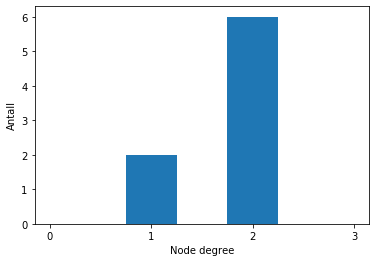

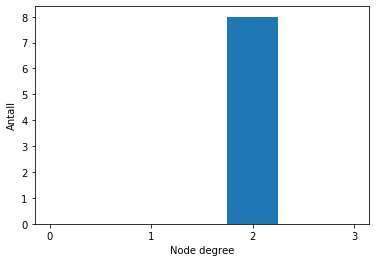

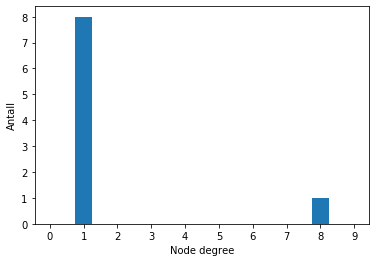

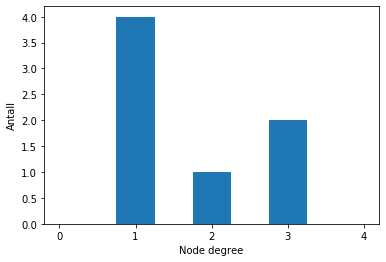

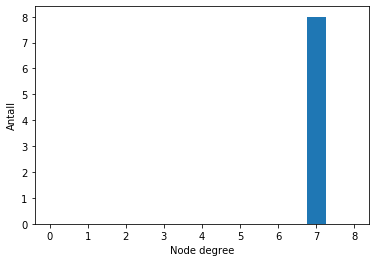

In [35]:
#Lag alle histogrammene under
BussGraph(8).histogram()
RingGraph(8).histogram()
StarGraph(8).histogram()
TreeGraph(2,2).histogram()
MeshGraph(8).histogram();

In [41]:
#Kommenter foreldingen av node degrees som vises i histogrammene her:
"""
V = vertecie(s); E = edge(s)
|v| = amount og vertecies; |e| amount of edges

BussGraph:
A buss-graph vil always have |E| = |V| - 1 edges because when you connect a V you always add 1 E, except for the first E,
that doesn't add any E

So the V at the end-points will only have 1 E and the rest will have 2 E
Exsample:
    A buss with 100 V will have 98 V with 2 E, and 2 V with 1 E
    
RingGraph:
A ring-graph is the same as a buss-graph, but all the V are conected with 2 E it will always have |E| = |V|, if |V| > 2



"""



"\nV = vertecie(s); E = edge(s)\n|v| = amount og vertecies; |e| amount of edges\n\nBussGraph:\nA buss-graph vil always have |E| = |V| - 1 edges because when you connect a V you always add 1 E, except for the first E,\nthat doesn't add any E\n\nSo the V at the end-points will only have 1 E and the rest will have 2 E\nExsample:\n    A buss with 100 V will have 98 V with 2 E, and 2 V with 1 E\n    \nRingGraph:\nA ring-graph is the same as a buss-graph, but all the V are conected with 2 E it will always have |E| = |V|, if |V| > 2\n\n\n\n"

# Del 2: Strukturanalyse
I denne delen skal vi introdusere flere grafstrukturer. Disse grafstrukturene er mer komplekse, men gjenspeiler bedre relle nettverk. <br/> <em>Et tips her er å bruke seed=student_seed for å få samme graf her gang.</em>

## Oppgave 2.1

Lag følgende 4 grafer, alle med 100 noder:

    Graf 1: En Barabasi Albert graf med parameter m=1
    Graf 2: En Barabasi Albert graf med parameter m=2
    Graf 3: En Watts Strogatz graf med parametre k=2 og p=0.1
    Graf 4: En Watts Strogatz graf med parametre k=4 og p=0.1

For hver av grafene, tegn de og lag et histogram over degree distribution.

<em> Her forventer vi at de fire grafene blir konstruert og printet. Vi forventer også å se et histogram for hver graf</em>

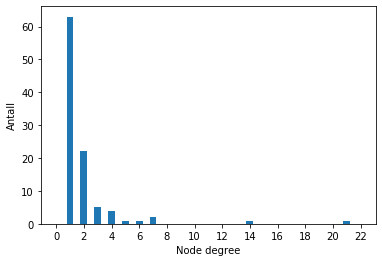

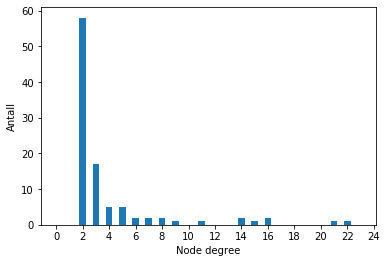

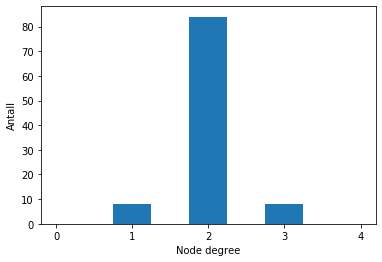

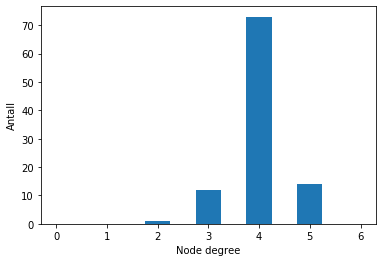

99
196
100
200


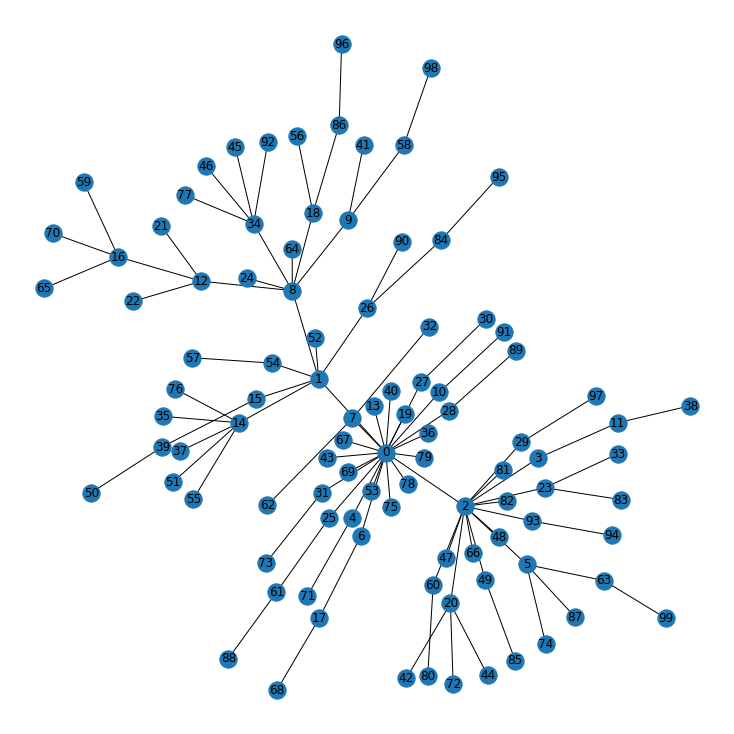

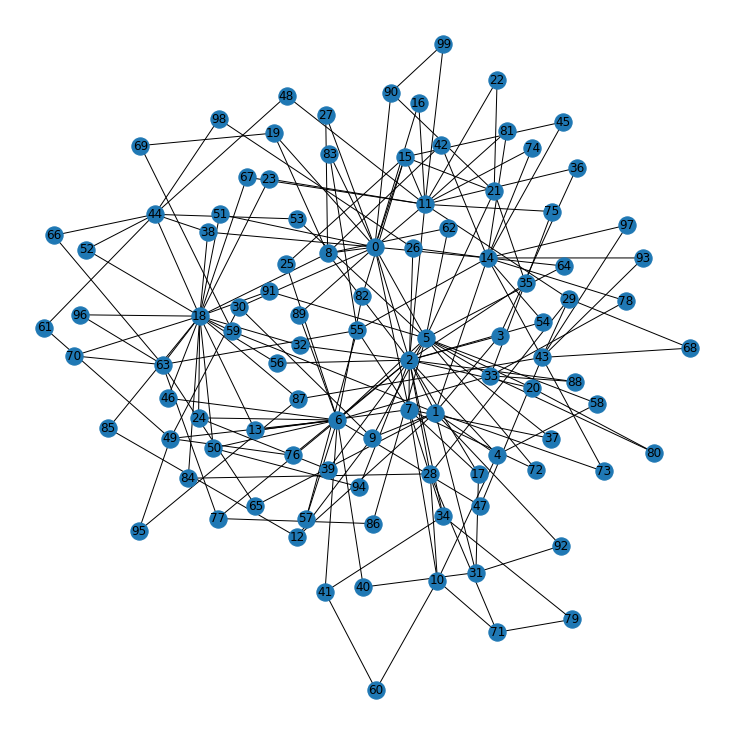

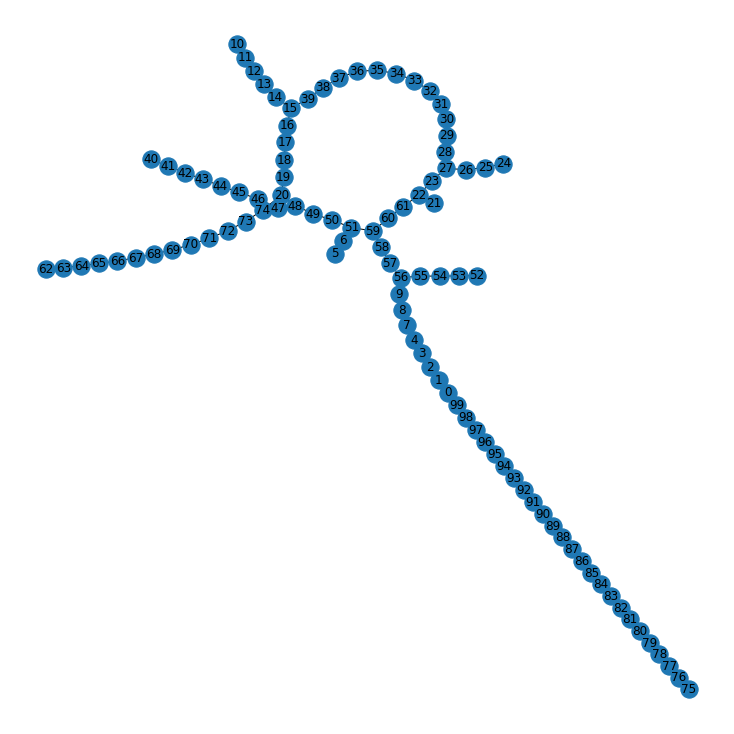

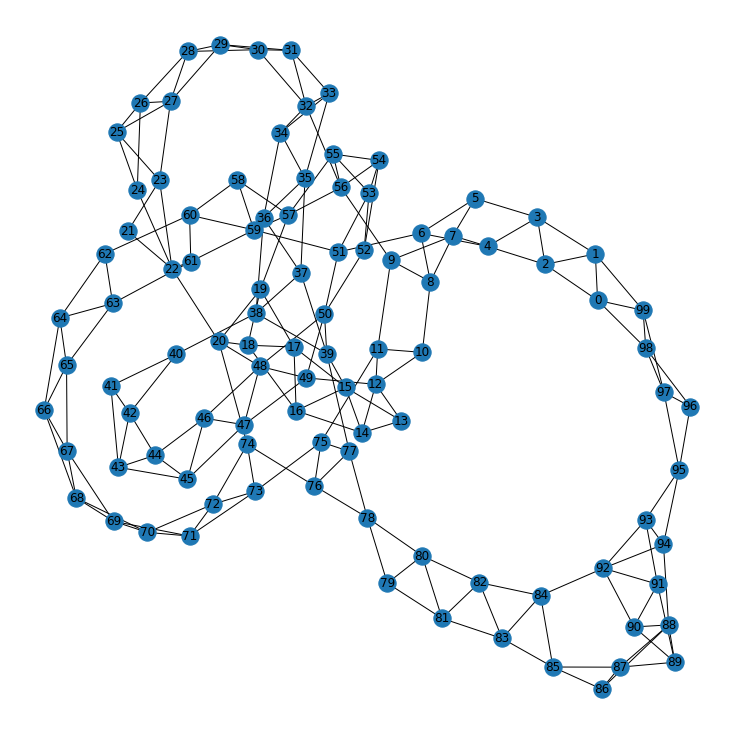

In [19]:
#Kode her
b1 = BarabasiAlbert(n= 100, m=1, seed=student_seed)
b2 = BarabasiAlbert(n= 100, m=2, seed=student_seed)

w1 = WattsStrogatz(n=100, k=2, p=0.1, seed=student_seed)
w2 = WattsStrogatz(n=100, k=4, p=0.1, seed=student_seed)

b1.histogram()
b2.histogram()
w1.histogram()
w2.histogram()

b1.draw()
b2.draw()
w1.draw()
w2.draw()

print(len(b1.edges()))
print(len(b2.edges()))
print(len(w1.edges()))
print(len(w2.edges()))


## Oppgave 2.1.1
Kommenter histogrammene over på hensyn av eventuelle styrker og sårbarheter de forskjellige grafene har

<em> Her forventer vi en sammenhengende tekst der man ser på likheter og forskjeller mellom de forskjellige grafene, med fokus på styrker og sårbarheter </em>

# Forklaring her:

## BarabasiAlbert (m=1):

Her ser vi at at det er klart flest noder med 1 degree,
Også er det noen får noder med svært høy degree

### Svakheter:
Nodene med mange kanter vil ha høy *betweennes centrality*,
fordi den korteste veien fra en node til en annen har høy sannylighet til å være via den.

Dette vil si at den noden vil motta høy trafikk og om den blir fjernet vil mange noder ikke kunne snakke med hverandre

### Styrker:
Siden det er lett å finne disse nodene med høy degree kan man i et nettverk gjøre disse nodene robuste og rakse
slik at det har kapasiteten til å håndtere trafikken mellom nodene

## BarabasiAlbert (m=2):

Her ser vi at det ikke er noen noder med lavere degree enn 2.
Det er fler noder med fler kanter enn på BA (m=1) som vil gjøre at trafikken blir mer fordelt gjennom de nodene.
Det er også mange fler degrees i denne grafen enn i BA(m=1)

### Svakheter:
Det er veldig mange degrees i grafen som gjør at det kan bli kostbart og kontruere og vedlikeholde

### Styrker:
Det vil være større sansylighet for at det er kortere veier fra en node til en annen enn i BA (m=2) som vil redusere trafikk





## WattsStrogatz (k=2, p=0.1):

Her ser vi at alle nodene har degree mellom 1 og 3, som vil si at det er ingen noder som har høy degree

### Svakheter:

Man kan se at grafen er bygd opp en *ringGrafer* og *bussgrafer* som går ut av ringen, 
om man fjerner den en node i ronggrafen som er koblet opp til en buss, vi hele bussen miste *kontakten* med resten av grafen
### Styrker:
Det er veldig få kanter, fordi ingen har høy kantverdi dette vil si at det ikke er så kostbart å konstruere og  vedlikeholde


## WattsStrogatz (k=4, p=0.1):

Her ser vi at det er ingen noder med degree 1 og veldig få med degreee 2,

Det er også ingen noder med høyere grad enn 5, med liket til WS (k=2) som kun har 4
### Svakheter:
Utrolig mange kanter, dette kan gjøre det veldig kostbart å kostruere og vedlikeholde
### Styrker:


## Oppgave 2.1.2
Konstruer et nettverk bestående av mellom 9 og 15 noder, med en node som har høyest betweenness centrality, og en av de laveste degree centrality

<em> Her forventer vi at studenten holder seg innenfor grensen på 9-15 noder, samt har konstruert en graf der en node har høyest betweenness centrality, men også en av de laveste degree centralitiene</em>

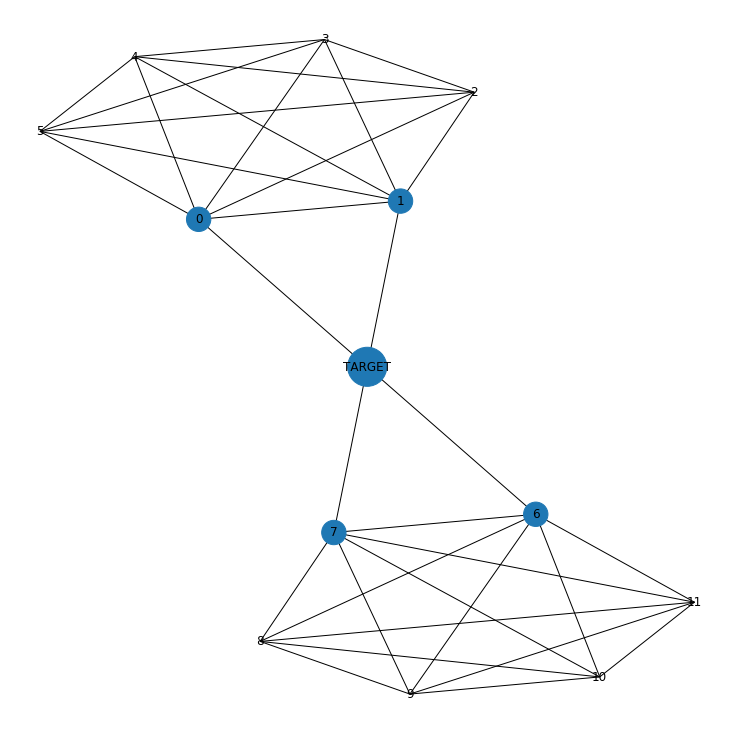

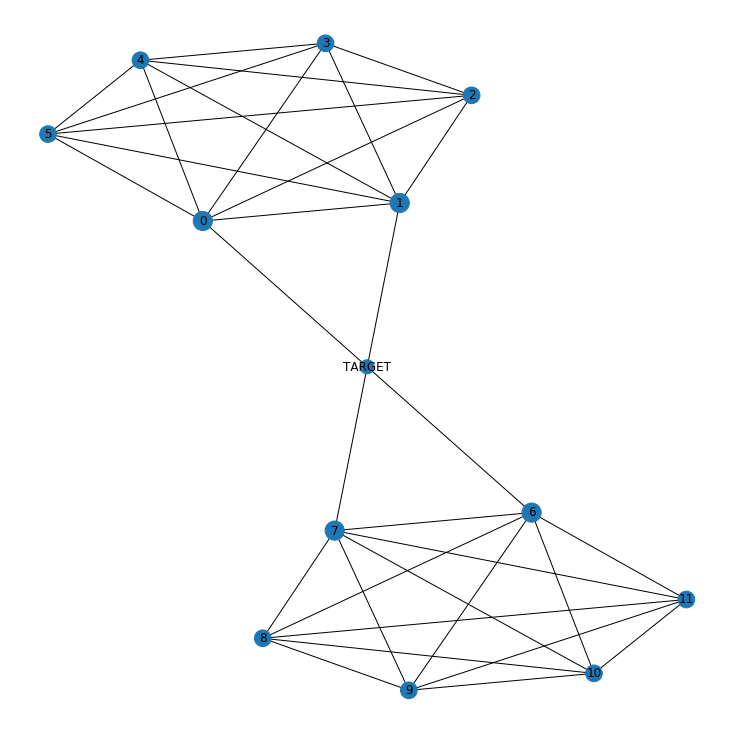

In [83]:
#Kode her

graph = Graph()
graph.add_node("TARGET")

for i in range(2):
    mesh = MeshGraph(range(i*6, (i+1)*6))
    graph.add_nodes_from(mesh.nodes())
    graph.add_edges_from(mesh.edges())
    graph.add_edges_from([("TARGET",i*6),("TARGET", i*6 + 1)])

graph.draw_betweenness_centrality()
graph.draw_degree_centrality()

## Oppgave 2.2

You will analyze the Garr201110 network.
Your network graph file is http://www.topology-zoo.org/files/Garr201110.graphml



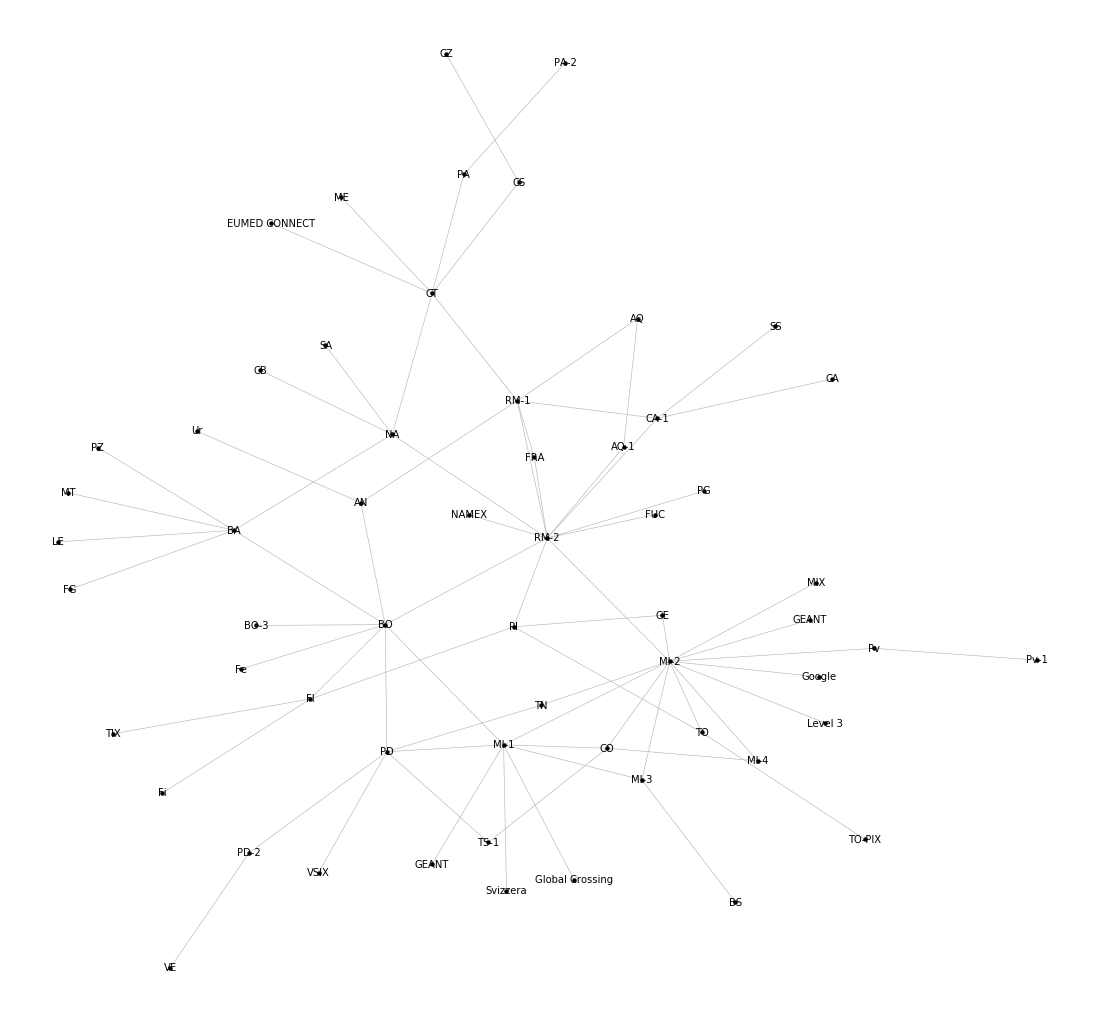

In [22]:
networkURL = get_network(student_seed)
# Du kan bruke variabelen networkURL som parameter i RealNetworkGraph
# Ved å bruke student_seed vil metoden hente samme nettverk hver gang
RealNetworkGraph(networkURL).draw()


I denne oppgaven skal vi analysere et ekte nettverk. Klassen <code>RealNetworkGraph()</code> tar inn en url av en fil med filtypen .graphml. Lag et objekt for nettverket du får i koden over og tegn det. Filene som kan analyseres finnes på nettsiden www.topology-zoo.org/dataset.html. Funksjonen over henter ut en ".graphml" fil du kan bruke, du kan eventuelt hente den ut selv og se på andre ved å se på nettsiden.

<em> Her forventer vi å se at studenten klarer å hente ut grafen som er blitt tildelt, konstruerer den og viser den frem i cellen nedenfor. </em>

In [ ]:
# Konstruer og tegn nettverket her

## Oppgave 2.2.1
Plott et histogram over degree distribution for nettverket over. Hva forteller histogrammet deg?

<em> Her forventer vi å se et histogram og en tekst om hva histogrammet forteller. Her kan det være lurt å blande inn histogrammer fra tidligere oppgaver, og bruke disse til å drøfte det reelle nettverket. </em>

In [ ]:
#Kode og forklaring her

## Oppgave 2.2.2
Under er det oppgitt en funksjon for å gi ut hvilke noder som er viktigst med de tre funksjonalitetene. Bruk funksjonen på grafen.
Er noen noder viktig i flere av sentralitetene? Hvorfor?

<em> Her forventer vi at studenten klarer å bruke metoden som er gitt, til å finne de viktigste nodene i hver kategori. Deretter forventer vi at studenten klarer å finne noder som er viktige i flere kategorier, og drøfter kort rundt dette.</em>

In [1]:
def get_centrality_table(graph):
    deg= graph.degree_centrality()
    cls = graph.closeness_centrality()
    betw = graph.betweenness_centrality()
    lst = [deg,cls,betw]
    for i,obj in enumerate(lst):
        values = [(graph.nodes[k]["label"],v) for k, v in sorted(obj.items(), key=lambda item: item[1])]
        values.reverse()
        lst[i] = values
    print("\nCentrality Indexer,\n-sortert i synkende rekkefølge\n")
    print("\033[1m" + "Degree".ljust(20) + "Closeness".ljust(20) + "Betweenes".ljust(20) + '\033[0m')
    for deg,cls,betw in zip(*lst):
        print(deg[0].ljust(20) + cls[0].ljust(20) + betw[0].ljust(20))


In [3]:
#Kode her

## Oppgave 2.3
<code>ConstructedGraph()</code> simulerer et reelt nettverk, bestående av et kjernenett med grid-struktur, et regionalnett og et tettbebygd aksessnett. Bruk klassen og tegn grafen.

For hver av de tre centralitiene, finn de mest sentrale nodene og tegn de. Hvor ligger de viktigste nodene, og hvordan ville du beskrevet robustheten til regionalnettet?

<em> Her forventer vi at studenten klarer å bruke ConstructedGraph() til å printe ut et reelt nettverk, og at studenten skjønner hvilke deler dette nettverket er bygget opp av. Deretter forventer vi at studenten viser de mest sentrale nodene innenfor hver kategori, forteller hvor i grafen de ligger, og drøfter robustheten til regionalnettet.  </em>

In [ ]:
#Kode her

In [ ]:
# Forklaring her

# Del 3: Angrep og robusthet
Her skal vi analysere og diskutere det simulerte nettverket fra oppgave 2.3 i dybden. I denne oppgaven vil vi bruke en utvidet versjon av nettverket.<br/>
Kjør cellen for å generere nettverket

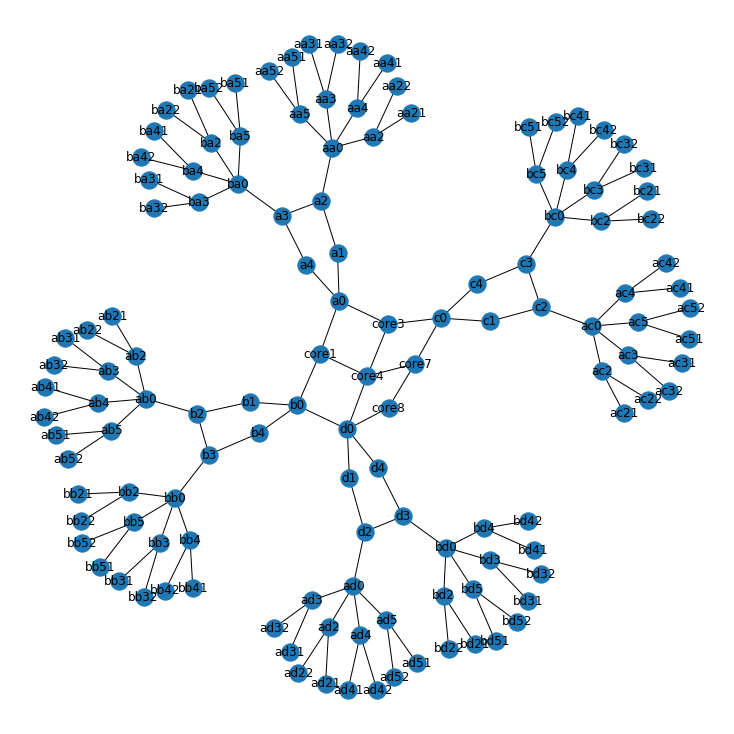

In [118]:
cg = ConstructedGraph(expanded=True)
cg.draw()

## Oppgave 3.1
Bruk de numeriske verdiene for de forskjellige centrality-målene for å finne hvilke noder i nettverket som er viktigst. Er det noen av nodene som overrasker deg?

<em> Her forventer vi å se at studenten bruker metoder som tidligere har blitt introdusert, til å finne de viktigste nodene i grafen. Deretter forventer vi å se en kort drøftende tekst på hvilke noder dette gjelder.</em>

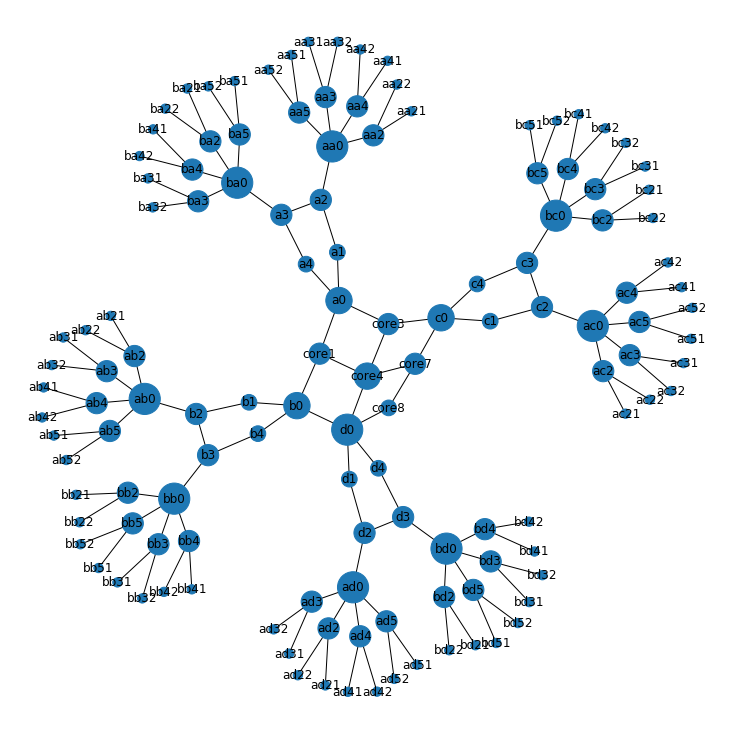

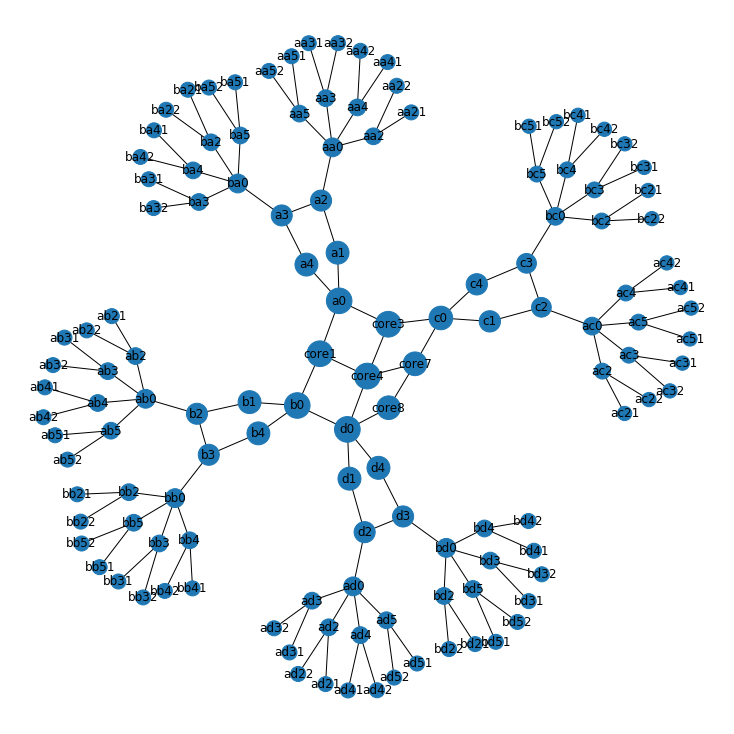

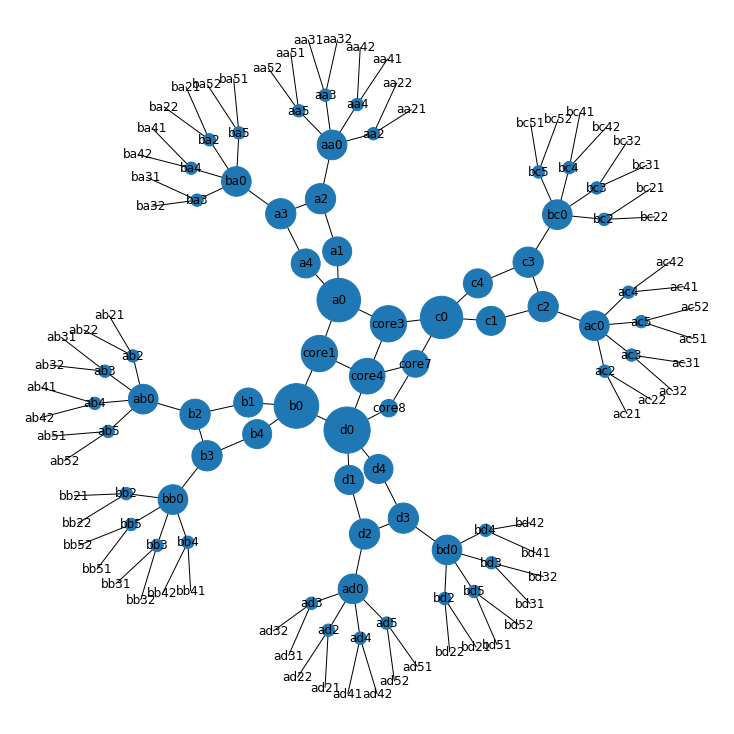

In [96]:
#Kode og forkaring her
cg.draw_degree_centrality()
cg.draw_closeness_centrality()
cg.draw_betweenness_centrality()

## Oppgave 3.2
Bruk metoden <code>delete_random_nodes</code> for å simulere tilfeldige feil som kan skje i nettverket.
* Fjern en node. Tegn så grafen
* Fjern tre noder. Tegn så grafen

Kommenter skaden av nettverket

<em> Her forventer vi å se at studenten klarer å printe ut to forskjellige grafer, en der en node er fjernet og en der tre noder er fjernet. Disse nodene skal være fjernet ved å bruke delete_random_nodes. Forventer også et kort analyse over nettverket, og drøftning av skaden disse feilene påførte nettverket. Her kan man dra inn metoder tidligere brukt</em>

In [ ]:
#Skriv koden her

In [97]:
# Forklaring her

## Oppgave 3.3
Prøv å angripe nettverket ved å bruke en kombinasjon av logisk tenkning og verdiene fra oppgave 3.1. Oppgaven her er å gjøre så mye skade som mulig ved å fjerne tre noder.

For hver node du velger å fjerne, begrunn hvorfor.

<em> Her forventer vi at studenten har forstått oppgaven og velger å fjerne tre noder som er svært sentrale. Forventer å se begrunnelse/tankegang for hver node som fjernes. </em>

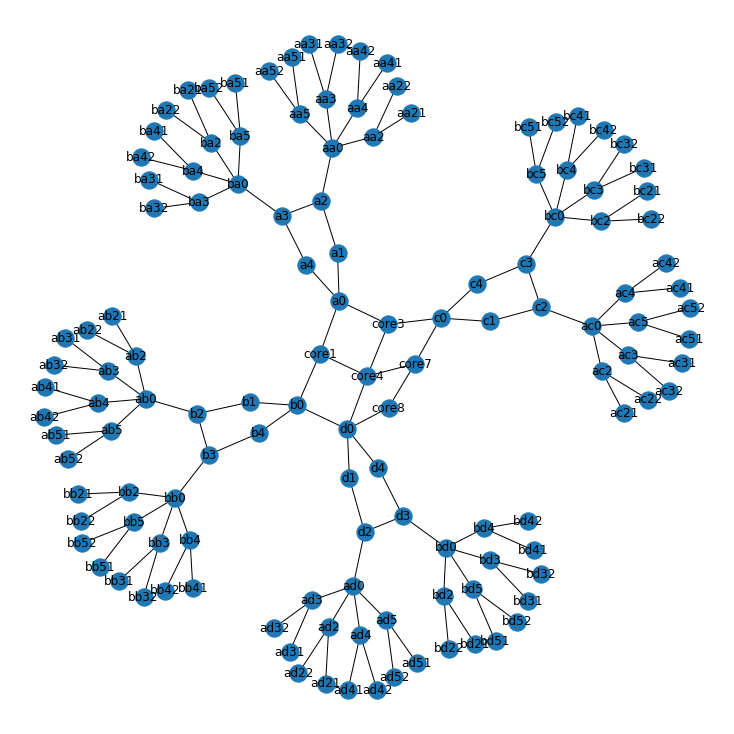

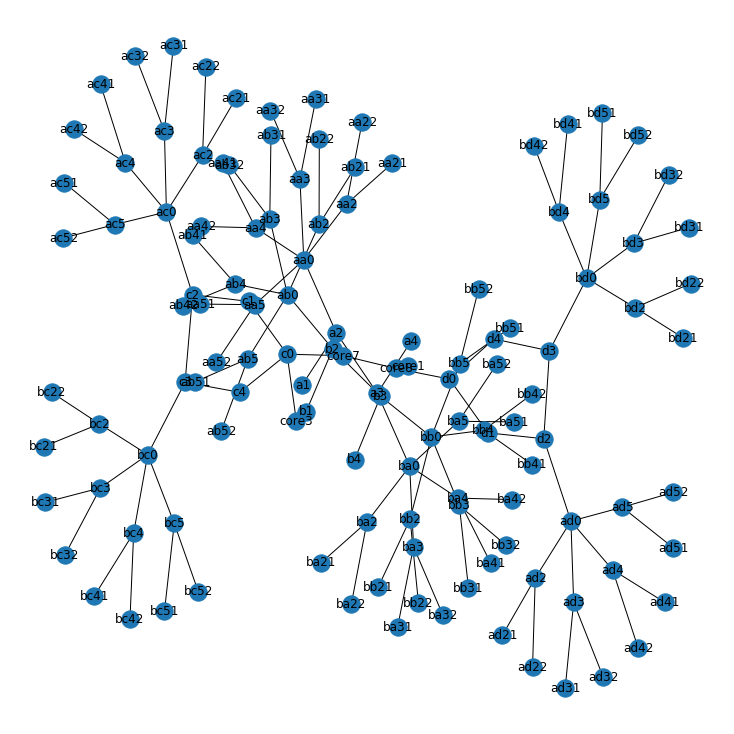

In [119]:
#Kode her
cg.draw()
cg.remove_node("a0")
cg.remove_node("b0")
cg.remove_node("core4")
cg.draw()


## Oppgave 3.4
En måte å se hvor mye skade som har blitt gjort på et nettverk er å bruke noder i største partisjon, eller se på node degree ved hjelp av et histogram.

Bruk disse metodene på oppgave 3.2 og 3.3, og diskuter skadene ut ifra resultatene du nå har fått.

<em> Her forventer vi å se at studenten klarer å vise et histogram og klarer å bruke metoden for å finne noder i største partisjon. Vi forventer også å se en drøftning av konsekvensene i de to foregående oppgavene, og at studenten skjønner alvorligheten i målrettede angrep.</em>

In [ ]:
#Kode her

In [ ]:
# Forklar her

## Oppgave 3.5
Forklar hva som menes med begrepet noder i største partisjon. Hva kan være fordeler og ulemper ved å kun bruke noder i største partisjon og histogram som pålitelighetsmål? Er dette fornuftig i vårt tilfelle?

<em> Her forventer vi å se at studenten har forstått begrepet noder i største partisjon, og hvorfor dette kan brukes til å vise sårbarhet. Vi forventer også en drøftning av hvorfor/hvorfor ikke, det kan være lurt å bruke noder i største partisjon og histogram som de eneste pålitelighetsmålene.</em>

In [ ]:
# Forklar her:

## Oppgave 3.6
Under ser du metoden for å lage en graf som sammenligner angrep med forskjellige metoder. Bruk metoden på det originale nettverket og sammenlign med det samme nettverket der du har lagt inn tre ekstra kanter som redundans. Diskuter kort effekten av ekstra redundans.

<em> Her forventer vi å se at studenten har klart å bruke metoden som er gitt til å vise skaden på det originale nettverket. Deretter forventer vi å se at studenten klarer å legge inn tre ekstra kanter, og begrunne hvorfor disse tre kantene er valgt. Til slutt vil vi se en kort diskusjon av effekten vi får av å legge til ekstra kanter i et nettverk.</em>

In [5]:
def get_attack_graph(G):
    count = G.number_of_nodes()
    outputs = [[0 for _ in range(count)] for _ in range(4)]
    graphs = [G for _ in range(4)]
    x = range(0,count)

    for i in x:
        for j, graph in enumerate(graphs):
            outputs[j][i] = graphs[j].get_largest_components_size()
        graphs[0] = graphs[0].delete_random_nodes(print_result=False)
        graphs[1] = graphs[1].delete_nodes_attack(centrality_index="degree",print_result=False)
        graphs[2] = graphs[2].delete_nodes_attack(centrality_index="closeness",print_result=False)
        graphs[3] = graphs[3].delete_nodes_attack(centrality_index="betweenness",print_result=False)

    bc1,bc2,bc3,bc4 = outputs
    plt.plot(x,bc1,color="red",label="Random faults")
    plt.plot(x,bc2,color="green",label="Degree centrality")
    plt.plot(x,bc3,color="blue",label="Closeness Centrality")
    plt.plot(x,bc4,color="orange", label="Betweenness Centrality")
    plt.ylabel("Amount of nodes in largest partition")
    plt.xlabel("Amount of nodes in removed")
    plt.legend(loc="upper right")
    plt.show()


# Del 4: Sikring av VDES

Du er nå ansatt som en sikkerhetsingeniør i VDES; og har som oppgave å sikrenettverket mot angrep, både mot ondsinnede handlinger og tilfeldige feil . Her er det viktig å analysere nettverket, finne low-hanging fruits og legge på ekstra redundans der det trengs, uten at kostnadene skal bli unødvendig høye. Bruk metodene som er lært i øvingen for å analysere og sikre nettverket. Forklar dine valg. Drøft konsekvensene av at ondsinnede aktører får tak i informasjonen rundt nettverket ditt. 

Analysen skal vise en gjennomgående forståelse av grafteori og grafteoretisk strukturell analyse. Bruk av fagbegreper og relevante begreper blir vektlagt. Oppgaven skal være kort og konsis og maks 800 ord. Start oppgaven med et bilde av nettverket og vis til figurer, histogrammer og grafer hvordan du vil sikre nettverket. Utforsk gjerne med å legge til redundans, teste angrep og vurdere tiltakene med histogram over node degree. Inkluder robusthetsgrafen og bruk den for å se på effekten. Bruk koden og resultatene som dokumentasjon for tiltakene og hva din anbefaling blir til VDES selskapet.

Netverket du skal analysere finner du vek å kjøre kodeblokken under:

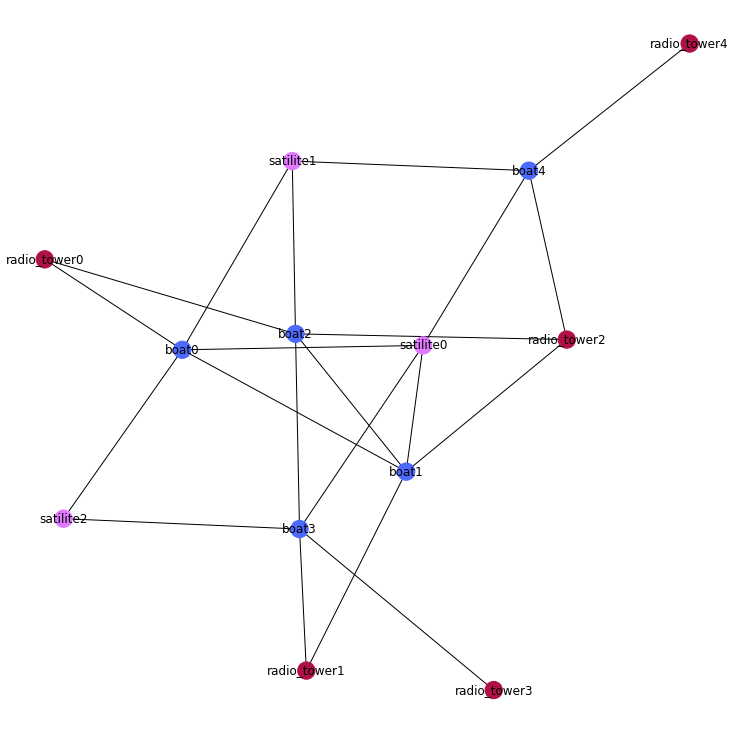

In [92]:
r.seed(student_seed)
boat_count = r.randint(4,9)
satellite_count = r.randint(1,3)
radio_tower_count = r.randint(2,5)

vdesGraph = VDESGraph(boat_count,satellite_count,radio_tower_count)
vdesGraph.draw()